<h2><font color="#004D7F" size=6>Prediciones</font></h2>



<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Danyela Luengas</font><br>
<font color="#004D7F" size=3>Machine Learning</font><br>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def circulo(a,b):
    r=np.sqrt(a**2+b**2)
    return r
a=0
b=1
c=0
d=1
n=100
X=np.random.rand(n)*(b-a)+a 
Y=np.random.rand(n)*(d-c)+c
r=circulo(X, Y)
[X,Y,r]
df=pd.DataFrame(data={'X' :X, 'Y':Y, 'r':r})
dataset= df.values
XX=dataset[:, 0:2]
yy=dataset[:,2]
yy.shape



(100,)

C:\Users\daalu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:611: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\daalu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MSE:,1.227%


array([0.09808184, 0.53584987, 0.71422703, 0.90101224, 0.25846022,
       0.67830621, 0.71298628, 0.77686055, 0.07608301, 0.82616904,
       0.82209943, 0.62217915, 0.04292784, 0.96165657, 0.60776751,
       0.26831912, 0.55146052, 0.23512667, 0.69584307, 0.31535404,
       0.19246566, 0.2753006 , 0.08874301, 0.10896154, 0.93239921,
       0.52782045, 0.49698955, 0.79997003, 0.15163919, 0.31752182,
       0.19503346, 0.45797719, 0.59936442])

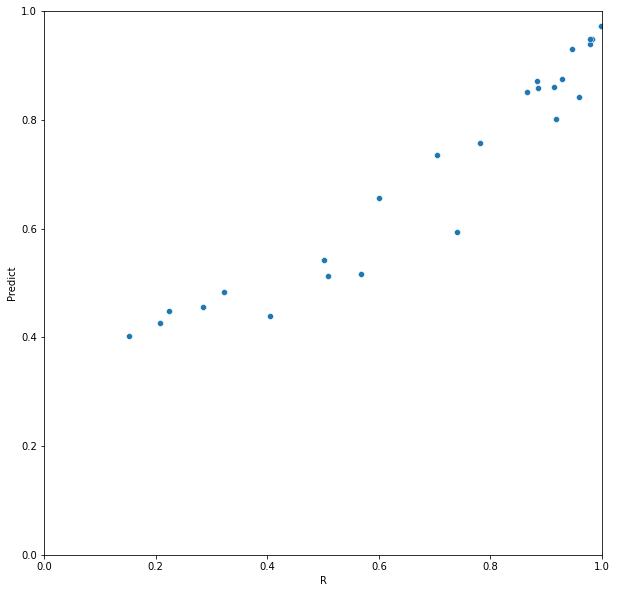

In [4]:
from sklearn.model_selection import train_test_split


test_size=0.33
seed = 7

X_train, X_test, y_train,  y_test = train_test_split(XX, yy, 
            test_size=test_size,  random_state=seed, shuffle=True)
X_train.shape
#Definir algoritmo de 
from sklearn.neural_network import MLPRegressor

import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import mean_squared_error

seed=7
model= MLPRegressor(hidden_layer_sizes=[10], activation='relu',  solver='adam', max_iter=200, random_state=seed,   batch_size=128, validation_fraction=0.1)
model.fit(X_train, y_train)

prediction= model.predict(X_test)
prediction
result=pd.DataFrame(data={'X' :X_test[:,0],'Y' :X_test[:,1], 'R':y_test, 'Predict': prediction})

result

mse=mean_squared_error(y_test, prediction)
print(f'MSE:,{mse*100.0:,.3f}%')

plt.figure(figsize=(10,10))
sns.scatterplot(data=result, x='R', y='Predict')
plt.xlim(0,1)
plt.ylim(0,1)
X_test[:,0]

In [5]:
score = model.score(X_train, y_train)
score

0.8242615134024988

In [6]:
import time

start_time=time.time()
model.predict(X_test)
print(time.time()-start_time)
start_time=time.time()
circulo(X_test[:,0],X_test[:,1])
print(time.time()-start_time)

0.0
0.0


In [7]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)



2.9.1


In [8]:
from sklearn.model_selection import train_test_split


test_size=0.33
seed = 7

X_train, X_test, y_train,  y_test = train_test_split(XX, yy, 
            test_size=test_size,  random_state=seed)
X_train.shape

(67, 2)

In [9]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(2,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse', 
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model



In [10]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')
    
    



In [12]:
EPOCHS = 100

history = model.fit(X_train, y_train,  epochs=EPOCHS, callbacks=[PrintDot()])

Epoch 1/100
3/3 [==============================] - 1s 4ms/step - loss: 0.6257 - mae: 0.7301 - mse: 0.6257
Epoch 2/100
3/3 [==============================] - 0s 0s/step - loss: 0.3923 - mae: 0.5735 - mse: 0.3923
Epoch 3/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2439 - mae: 0.4457 - mse: 0.2439
Epoch 4/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1554 - mae: 0.3486 - mse: 0.1554
Epoch 5/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0991 - mae: 0.2740 - mse: 0.0991
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0574 - mae: 0.2051 - mse: 0.0574
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0285 - mae: 0.1430 - mse: 0.0285
Epoch 8/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0171 - mae: 0.1120 - mse: 0.0171
Epoch 9/100
3/3 [==============================] - 0s 1ms/step - loss: 0.0102 - mae: 0.0867 - mse: 0.0102
Epoch 10/100
3/3 [=============================

3/3 [==============================] - 0s 0s/step - loss: 4.6089e-04 - mae: 0.0194 - mse: 4.6089e-04
Epoch 74/100
3/3 [==============================] - 0s 4ms/step - loss: 5.6394e-04 - mae: 0.0213 - mse: 5.6394e-04
Epoch 75/100
3/3 [==============================] - 0s 2ms/step - loss: 2.6035e-05 - mae: 0.0037 - mse: 2.6035e-05
Epoch 76/100
3/3 [==============================] - 0s 4ms/step - loss: 2.7693e-05 - mae: 0.0039 - mse: 2.7693e-05
Epoch 77/100
3/3 [==============================] - 0s 0s/step - loss: 2.6164e-04 - mae: 0.0147 - mse: 2.6164e-04
Epoch 78/100
3/3 [==============================] - 0s 0s/step - loss: 4.3485e-04 - mae: 0.0192 - mse: 4.3485e-04
Epoch 79/100
3/3 [==============================] - 0s 2ms/step - loss: 5.2487e-04 - mae: 0.0197 - mse: 5.2487e-04
Epoch 80/100
3/3 [==============================] - 0s 7ms/step - loss: 1.0012e-04 - mae: 0.0089 - mse: 1.0012e-04
Epoch 81/100
3/3 [==============================] - 0s 3ms/step - loss: 2.1874e-04 - mae: 0.0136

In [13]:
print(X_test.shape)
print(y_train.shape)

(33, 2)
(67,)


In [14]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,epoch
95,0.000057,0.005980,0.000057,95
96,0.000043,0.005751,0.000043,96
97,0.000013,0.002621,0.000013,97
98,0.000013,0.002368,0.000013,98
99,0.000011,0.002082,0.000011,99


2/2 [==============================] - 0s 0s/step


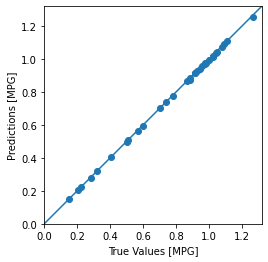

In [15]:

test_predictions = model.predict(X_test).flatten()
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])